In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from dependencies import preprocess

In [2]:
# Loading the dataset
cancer_data = load_breast_cancer()

In [3]:
# Checking the attributes of the data
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Checking the description of the data
print(cancer_data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# Printing the counts of target values
print(np.unique(cancer_data.target, return_counts=True))

# Displaying a message
print("\n")
print("Therefore, target 0 is Malignant and target 1 is Benign")

(array([0, 1]), array([212, 357]))


Therefore, target 0 is Malignant and target 1 is Benign


In [6]:
# Creating the dataframe
cancer_df = pd.DataFrame(data=cancer_data["data"], columns=cancer_data["feature_names"])

# Displaying the dataframe
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

In [7]:
# Checking for missing values
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [8]:
# Checking for correlation between features
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Data Preprocessing

In [9]:
# Preprocessing the data with Standardization and PCA
reduced_data = preprocess(cancer_df)

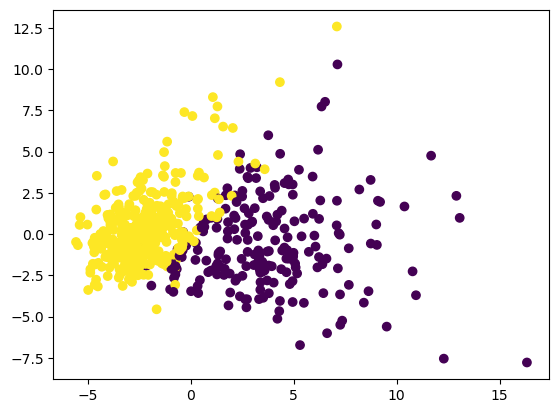

In [10]:
# Plotting the reduced data
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=cancer_data["target"])

In [11]:
# Converting the reduced data into a dataframe
new_df = pd.DataFrame(reduced_data, columns=[["PC1", "PC2"]])

# Adding the target values to new dataframe
new_df["Target"] = cancer_data["target"]

# Displaying the new dataframe
new_df.head()

,PC1,PC2,Target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


### Model Training

In [12]:
# Splitting the data into features and target
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

In [13]:
# Creating a function to perform Logistic Regression efficiently
def EfficientLogisticRegression(X, y):

    # Initializing max score to 0 and best model to Nonw
    max_score = 0
    best_model = None

    # Creating a for loop from 0 to 99
    for i in range(0, 100):

        # Splitting the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        # Creating a logistic regression model
        model = LogisticRegression()

        # Fitting the model
        model.fit(X_train, y_train)

        # Predicting the test targets
        y_pred = model.predict(X_test)

        # Calculating the accuracy of the model
        score = r2_score(y_test, y_pred)

        # Checking whether score is higher than max score
        if(score > max_score):

            # Replacing max score with score
            max_score = score

            # Replacing the best model with the current model
            best_model = model

    # Returning the max score and the model
    return max_score, model

# Rertieving the score and the model
logistic_score, logistic_model = EfficientLogisticRegression(X, y)

# Displaying the accuracy
print(logistic_score)

0.9235469448584203


In [14]:
# Creating a function to perform Support Vector Classification efficiently
def EfficientSVC(X, y):

    # Initializing max score to 0 and best model to Nonw
    max_score = 0
    best_model = None

    # Creating a for loop from 0 to 99
    for i in range(0, 100):

        # Splitting the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        # Creating a logistic regression model
        model = SVC()

        # Fitting the model
        model.fit(X_train, y_train)

        # Predicting the test targets
        y_pred = model.predict(X_test)

        # Calculating the accuracy of the model
        score = r2_score(y_test, y_pred)

        # Checking whether score is higher than max score
        if(score > max_score):

            # Replacing max score with score
            max_score = score

            # Replacing the best model with the current model
            best_model = model

    # Returning the max score and the model
    return max_score, model

# Retrieving the score and the model
svc_score, svc_model = EfficientSVC(X, y)

# Displaying the accuracy
print(svc_score)

0.9235469448584203


In [15]:
# Creating a function to perform Support Vector Classification efficiently
def EfficientNB(X, y):

    # Initializing max score to 0 and best model to Nonw
    max_score = 0
    best_model = None

    # Creating a for loop from 0 to 99
    for i in range(0, 100):

        # Splitting the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        # Creating a logistic regression model
        model = GaussianNB()

        # Fitting the model
        model.fit(X_train, y_train)

        # Predicting the test targets
        y_pred = model.predict(X_test)

        # Calculating the accuracy of the model
        score = r2_score(y_test, y_pred)

        # Checking whether score is higher than max score
        if(score > max_score):

            # Replacing max score with score
            max_score = score

            # Replacing the best model with the current model
            best_model = model

    # Returning the max score and the model
    return max_score, model

# Rertieving the score and the model
nb_score, nb_model = EfficientNB(X, y)

# Displaying the accuracy
print(nb_score)

0.8240740740740741


### Predicting New Data

#### I will be using the Logistic Regression Model since that provided the highest accuracy

In [16]:
# Assigning the new data and target
new_data = X[476,:]
new_target = y[476]

# Predicting on the new data
new_pred = logistic_model.predict(new_data.reshape(1,2))

# Displaying the target and the prediction
print(new_target)
print(new_pred[0])

1
1


### Saving The Model

In [17]:
# Saving the model
pickle.dump(logistic_model, open("logistic_model.pkl", "wb"))